In [106]:
# Times series yapmadan yalnızca bu bilgiler ile bi hastanın yaklaşık 2 yıl yaşayıp yaşamayacağını tahmin etmek amaçlandı.
# Yaklaşık 4 yıl denmesinin nednei ilk kontrol ile son kontrol arasındaki maks farkın 4 sene olması...

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import numpy as np
import pandas as pd
import keras 

from sklearn.model_selection import train_test_split
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score

from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("/content/drive/My Drive/BRCA.csv",sep= ';')

In [5]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,80353,42638,54715,27368,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15.01.2017,19.06.2017,Alive
1,TCGA-EW-A1OX,43,FEMALE,-42032,57807,61447,-31505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26.04.2017,9.11.2018,Dead
2,TCGA-A8-A079,69,FEMALE,21398,13114,-32747,-23426,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8.09.2017,9.06.2018,Alive
3,TCGA-D8-A1XR,56,FEMALE,34509,-21147,-19304,12427,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25.01.2017,12.07.2017,Alive
4,TCGA-BH-A0BF,56,FEMALE,22155,19068,52045,-31199,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6.05.2017,27.06.2019,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,FEMALE,2318,61804,-55779,-51735,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11.11.2019,9.02.2020,Dead
330,TCGA-A8-A085,44,MALE,73272,11117,-26952,-35492,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,1.11.2019,4.03.2020,Dead
331,TCGA-A1-A0SG,61,FEMALE,-71947,25485,-15024,33968,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11.11.2019,18.01.2021,Dead
332,TCGA-A2-A0EU,79,FEMALE,4794,20559,-53136,-18848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21.11.2019,19.02.2021,Dead


,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.067571,0.016551,-0.014513,0.018354
Protein1,-0.067571,1.000000,0.055468,-0.048891,0.129497
Protein2,0.016551,0.055468,1.000000,-0.246312,-0.062081
Protein3,-0.014513,-0.048891,-0.246312,1.000000,0.012225
Protein4,0.018354,0.129497,-0.062081,0.012225,1.000000


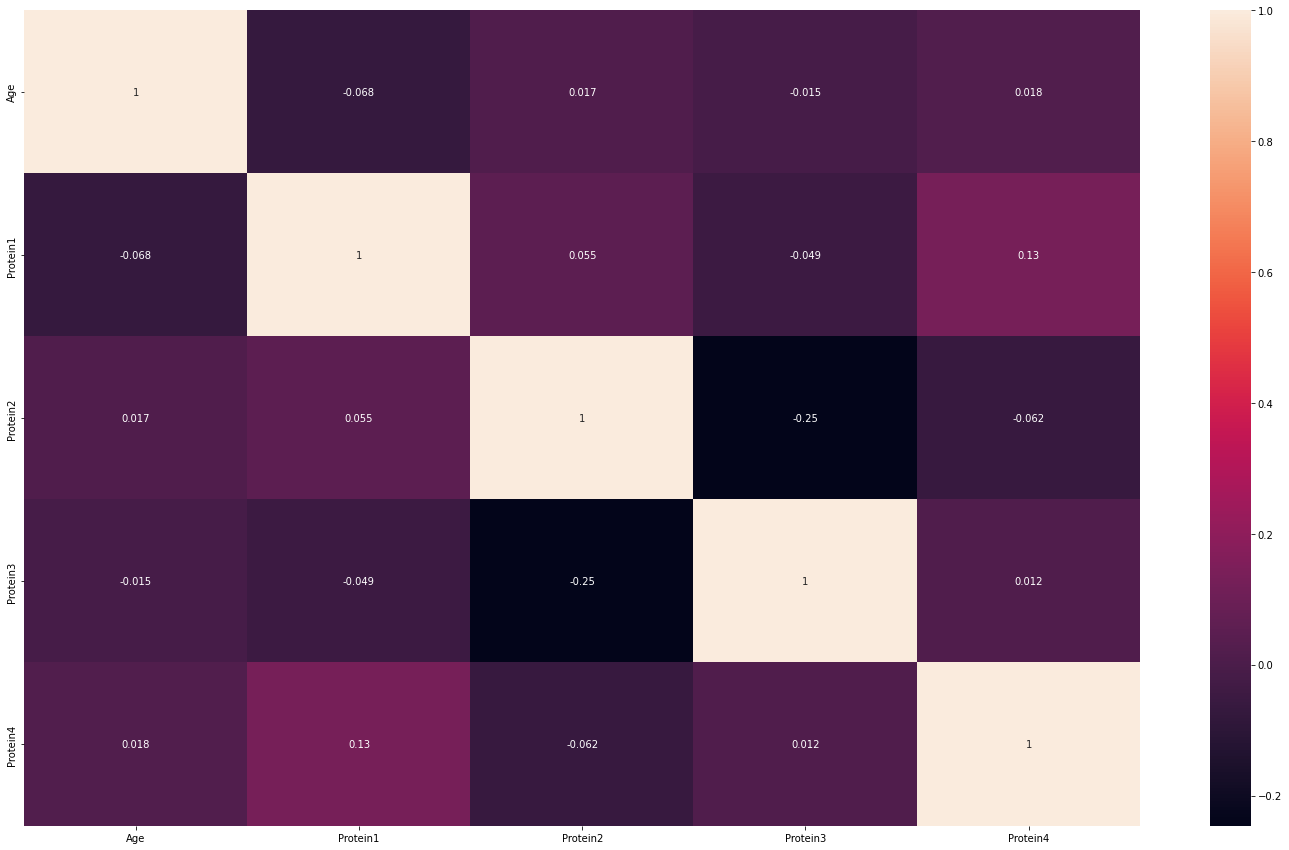

In [19]:
# Heatmap Correlation:

def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (25,15))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

show_correlations(df)

# It is aimed to see the correlation between different parameters with each other and the Quantity value. 

In [7]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [8]:
df_new = df.copy()

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient_ID          334 non-null    object
 1   Age                 334 non-null    int64 
 2   Gender              334 non-null    object
 3   Protein1            334 non-null    int64 
 4   Protein2            334 non-null    int64 
 5   Protein3            334 non-null    int64 
 6   Protein4            334 non-null    int64 
 7   Tumour_Stage        334 non-null    object
 8   Histology           334 non-null    object
 9   ER status           334 non-null    object
 10  PR status           334 non-null    object
 11  HER2 status         334 non-null    object
 12  Surgery_type        334 non-null    object
 13  Date_of_Surgery     334 non-null    object
 14  Date_of_Last_Visit  317 non-null    object
 15  Patient_Status      321 non-null    object
dtypes: int64(5), object(11)
me

In [10]:
df_new = df_new.dropna(how='any',axis=0) 

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
Patient_ID,1.000000,-0.037948,NaN,-0.020691,-0.081701,0.001392,-0.028597,-0.094457,0.013603,NaN,NaN,0.013382,-0.103856,0.990394,0.954876,-0.035852
Age,-0.037948,1.000000,NaN,-0.060221,0.034894,-0.041556,-0.000215,0.155775,-0.099455,NaN,NaN,-0.068131,0.057978,-0.054826,-0.033920,-0.001833
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protein1,-0.020691,-0.060221,NaN,1.000000,0.070754,-0.054813,0.147373,-0.084251,0.049794,NaN,NaN,-0.015018,-0.050124,-0.013352,-0.028007,-0.089860
Protein2,-0.081701,0.034894,NaN,0.070754,1.000000,-0.240028,-0.050524,0.007025,0.148327,NaN,NaN,0.015462,0.121154,-0.085354,-0.068973,0.074681
Protein3,0.001392,-0.041556,NaN,-0.054813,-0.240028,1.000000,0.013004,-0.044606,-0.055022,NaN,NaN,0.055433,-0.099908,-0.000101,-0.013717,0.031475
Protein4,-0.028597,-0.000215,NaN,0.147373,-0.050524,0.013004,1.000000,-0.020758,-0.007362,NaN,NaN,0.004136,-0.074344,-0.047717,-0.039606,0.023051
Tumour_Stage,-0.094457,0.155775,NaN,-0.084251,0.007025,-0.044606,-0.020758,1.000000,-0.046557,NaN,NaN,-0.142814,0.172306,-0.110466,-0.059226,-0.059914
Histology,0.013603,-0.099455,NaN,0.049794,0.148327,-0.055022,-0.007362,-0.046557,1.000000,NaN,NaN,-0.009534,-0.031481,0.011372,0.008125,-0.038398
ER status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


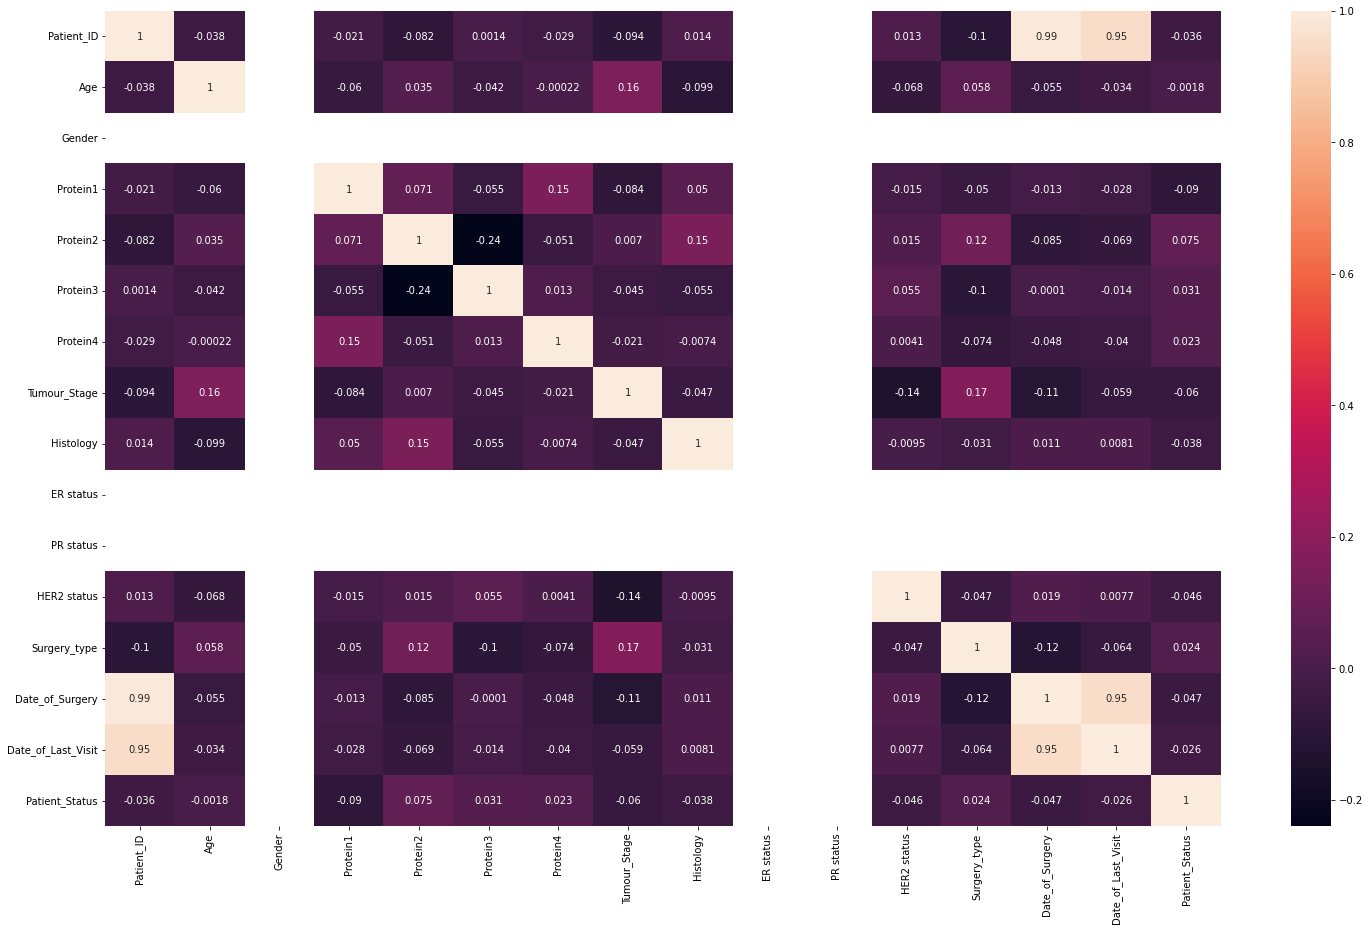

In [20]:
show_correlations(df_new)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient_ID          317 non-null    object
 1   Age                 317 non-null    int64 
 2   Gender              317 non-null    object
 3   Protein1            317 non-null    int64 
 4   Protein2            317 non-null    int64 
 5   Protein3            317 non-null    int64 
 6   Protein4            317 non-null    int64 
 7   Tumour_Stage        317 non-null    object
 8   Histology           317 non-null    object
 9   ER status           317 non-null    object
 10  PR status           317 non-null    object
 11  HER2 status         317 non-null    object
 12  Surgery_type        317 non-null    object
 13  Date_of_Surgery     317 non-null    object
 14  Date_of_Last_Visit  317 non-null    object
 15  Patient_Status      317 non-null    object
dtypes: int64(5), object(11)
me

In [12]:
char_cols = df_new.dtypes.pipe(lambda x: x[x== 'object']).index
for c in char_cols:
  df_new[c] = pd.factorize(df_new[c])[0]
df_new.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,36,0,80353,42638,54715,27368,0,0,0,0,0,0,0,0,0
1,1,43,0,-42032,57807,61447,-31505,1,1,0,0,0,1,1,1,1
2,2,69,0,21398,13114,-32747,-23426,0,0,0,0,0,2,2,2,0
3,3,56,0,34509,-21147,-19304,12427,1,0,0,0,0,0,3,3,0
4,4,56,0,22155,19068,52045,-31199,1,0,0,0,0,2,4,4,1


In [13]:
Gender_count = df_new['Gender'].value_counts()
Gender_count

0    313
1      4
Name: Gender, dtype: int64

In [14]:
# Erkek hastaların sayısı kadın hastalara oranla oldukça düşük. Bu nedenle veri setinden çıkartıldı. Görsel eklenebilir grafik vs.
df_new.drop(df_new.loc[df_new['Gender']==1].index, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Patient_ID          313 non-null    int64
 1   Age                 313 non-null    int64
 2   Gender              313 non-null    int64
 3   Protein1            313 non-null    int64
 4   Protein2            313 non-null    int64
 5   Protein3            313 non-null    int64
 6   Protein4            313 non-null    int64
 7   Tumour_Stage        313 non-null    int64
 8   Histology           313 non-null    int64
 9   ER status           313 non-null    int64
 10  PR status           313 non-null    int64
 11  HER2 status         313 non-null    int64
 12  Surgery_type        313 non-null    int64
 13  Date_of_Surgery     313 non-null    int64
 14  Date_of_Last_Visit  313 non-null    int64
 15  Patient_Status      313 non-null    int64
dtypes: int64(16)
memory usage: 41.6 KB


In [15]:
df_new

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,36,0,80353,42638,54715,27368,0,0,0,0,0,0,0,0,0
1,1,43,0,-42032,57807,61447,-31505,1,1,0,0,0,1,1,1,1
2,2,69,0,21398,13114,-32747,-23426,0,0,0,0,0,2,2,2,0
3,3,56,0,34509,-21147,-19304,12427,1,0,0,0,0,0,3,3,0
4,4,56,0,22155,19068,52045,-31199,1,0,0,0,0,2,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,311,60,0,94585,10003,-22575,48602,0,0,0,0,0,3,175,281,1
329,312,36,0,2318,61804,-55779,-51735,0,0,0,0,1,3,176,252,1
331,314,61,0,-71947,25485,-15024,33968,1,0,0,0,0,1,176,283,1
332,315,79,0,4794,20559,-53136,-18848,2,0,0,0,1,1,177,284,1


In [28]:
X = df_new.iloc[:,[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
y = df_new.iloc[:,15].values

In [29]:
# Since the distributions of the datas are quite different, the input parameters must be brought to the same scale in order for the results to be more reliable.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 0) 

In [31]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [32]:
# Since Mean Absolute Percentage Error (MAPE) is available with the new version (0.24) of sklearn and there is an error in importing the new version to Colab, the related error metric is defined as a function:

def mape(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
# The distribution of the actual values and the predictions made by the algorithms is intended to be shown not only with numerical error metrics, but also with visual graphics:

def predVisualization(test_pred,y_test):
  x_ax = range(len(test_pred))
  figure(figsize=(30, 10), dpi=80)
  plt.scatter(x_ax, y_test, lw=6, color="blue", label="original")
  plt.scatter(x_ax, test_pred, lw=4, color="red", label="predicted_rtc")
  plt.legend()
  plt.style.use('default')
  plt.show()

In [94]:
def LogRes(X_train,Y_train,X_test,Y_test):
  lr = LogisticRegression()
  model = lr.fit(X_train, Y_train)
  train_preds = lr.predict(X_train)
  test_preds = lr.predict(X_test)

  # Scores

  accuracy_score_train = accuracy_score(Y_train, train_preds)
  accuracy_score_test = accuracy_score(Y_test, test_preds)

  print('accuracy_score_train: ', accuracy_score_train)
  print('accuracy_score_test: ', accuracy_score_test)

  predVisualization(test_preds,Y_test)

  confusion_matrix_train = confusion_matrix(Y_train, train_preds)
  confusion_matrix_test = confusion_matrix(Y_test, test_preds)

  print("train_confussion_matrix: ")
  print(confusion_matrix_train)
  print("test_confussion_matrix: ")
  print(confusion_matrix_test)

accuracy_score_train:  0.7945205479452054
accuracy_score_test:  0.8297872340425532


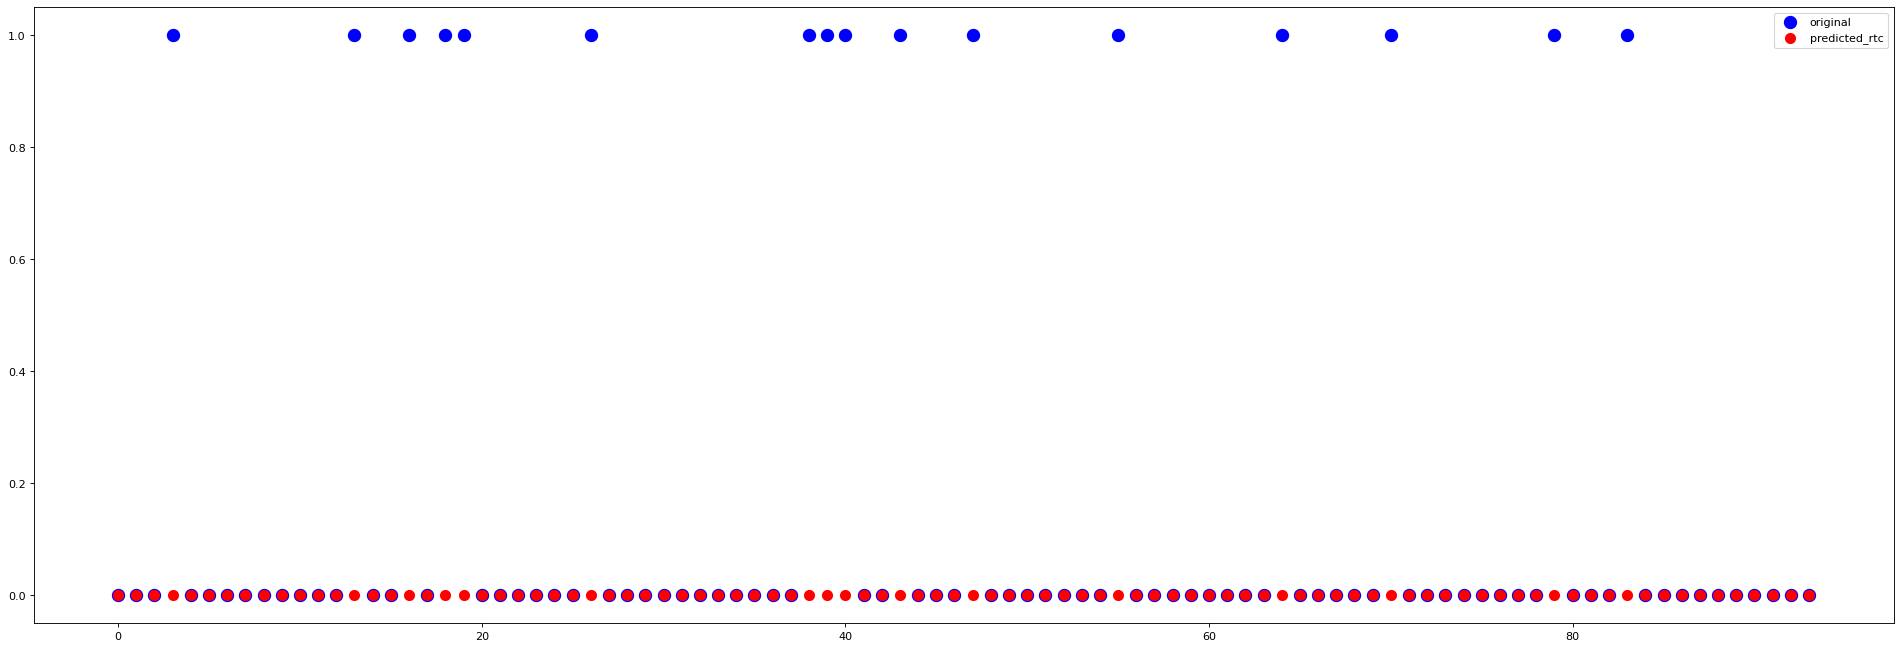

train_confussion_matrix: 
[[174   0]
 [ 45   0]]
test_confussion_matrix: 
[[78  0]
 [16  0]]


In [95]:
LogRes(X_train, y_train, X_test, y_test)

In [104]:
# XGBOOST without GridSearch:

def XGB(X_train,Y_train,X_test,Y_test):
  xgb_cl = XGBClassifier(objective='reg:squarederror')
  xgb_cl.fit(X_train, Y_train)
  train_preds = xgb_cl.predict(X_train)
  test_preds = xgb_cl.predict(X_test)

  # Scores

  accuracy_score_train = accuracy_score(Y_train, train_preds)
  accuracy_score_test = accuracy_score(Y_test, test_preds)

  print('accuracy_score_train: ', accuracy_score_train)
  print('accuracy_score_test: ', accuracy_score_test)

  predVisualization(test_preds,Y_test)

  confusion_matrix_train = confusion_matrix(Y_train, train_preds)
  confusion_matrix_test = confusion_matrix(Y_test, test_preds)

  print("train_confussion_matrix: ")
  print(confusion_matrix_train)
  print("test_confussion_matrix: ")
  print(confusion_matrix_test)

accuracy_score_train:  0.9771689497716894
accuracy_score_test:  0.7872340425531915


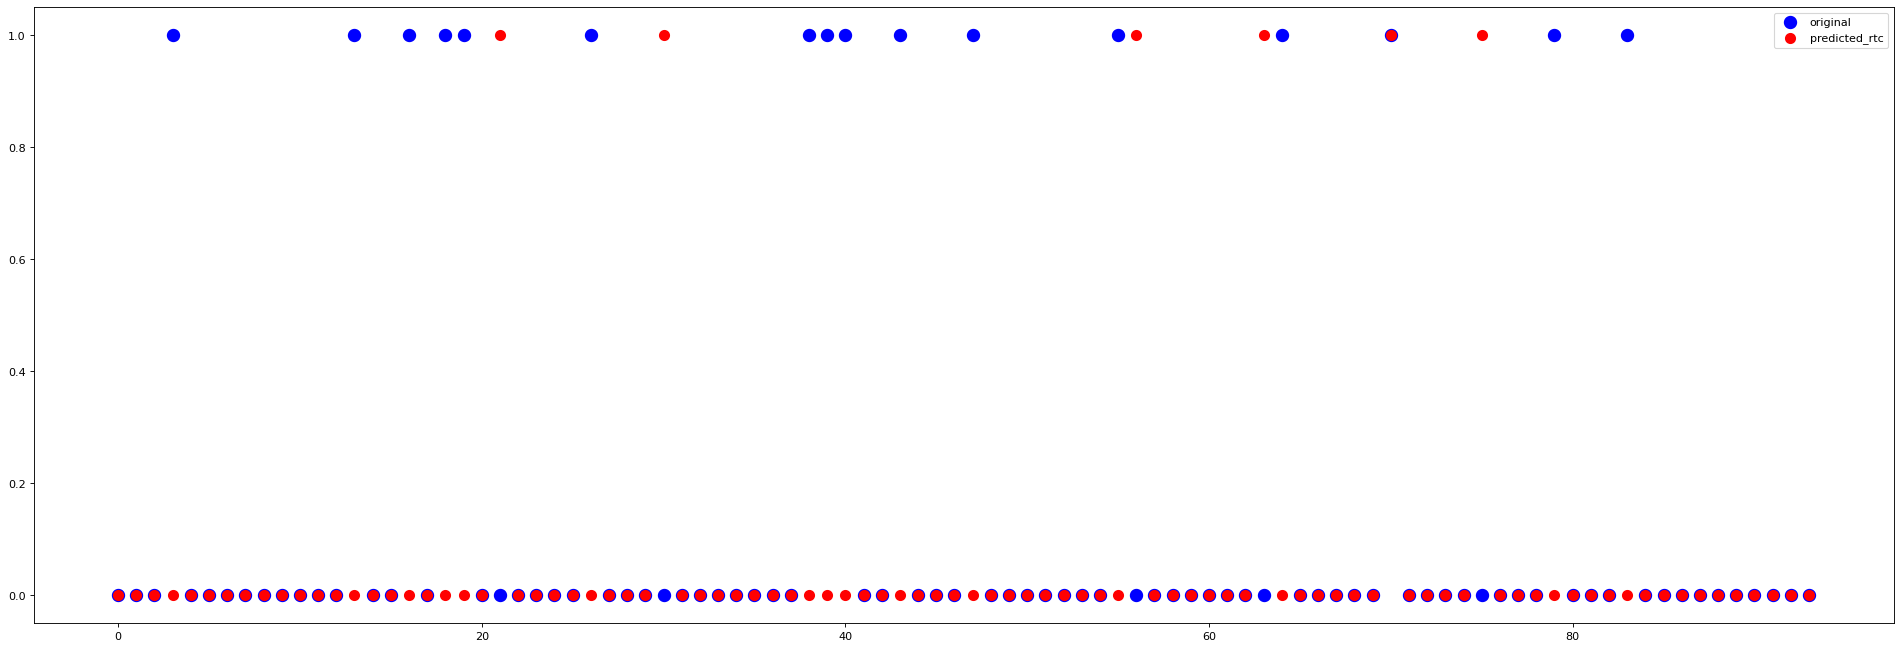

train_confussion_matrix: 
[[174   0]
 [  5  40]]
test_confussion_matrix: 
[[73  5]
 [15  1]]


In [105]:
XGB(X_train, y_train, X_test, y_test)

In [98]:
def RFC(X_train,Y_train,X_test,Y_test):
  rfc = RandomForestClassifier(n_estimators=10)
  rfc.fit(X_train, y_train)
  train_preds = rfc.predict(X_train)
  test_preds = rfc.predict(X_test)

  # Scores

  accuracy_score_train =accuracy_score(Y_train, train_preds)
  accuracy_score_test = accuracy_score(Y_test, test_preds)

  print('accuracy_score_train: ', accuracy_score_train)
  print('accuracy_score_test: ', accuracy_score_test)

  predVisualization(test_preds,Y_test)

  confusion_matrix_train = confusion_matrix(Y_train, train_preds)
  confusion_matrix_test = confusion_matrix(Y_test, test_preds)

  print("train_confussion_matrix: ")
  print(confusion_matrix_train)
  print("test_confussion_matrix: ")
  print(confusion_matrix_test)

accuracy_score_train:  0.9680365296803652
accuracy_score_test:  0.8085106382978723


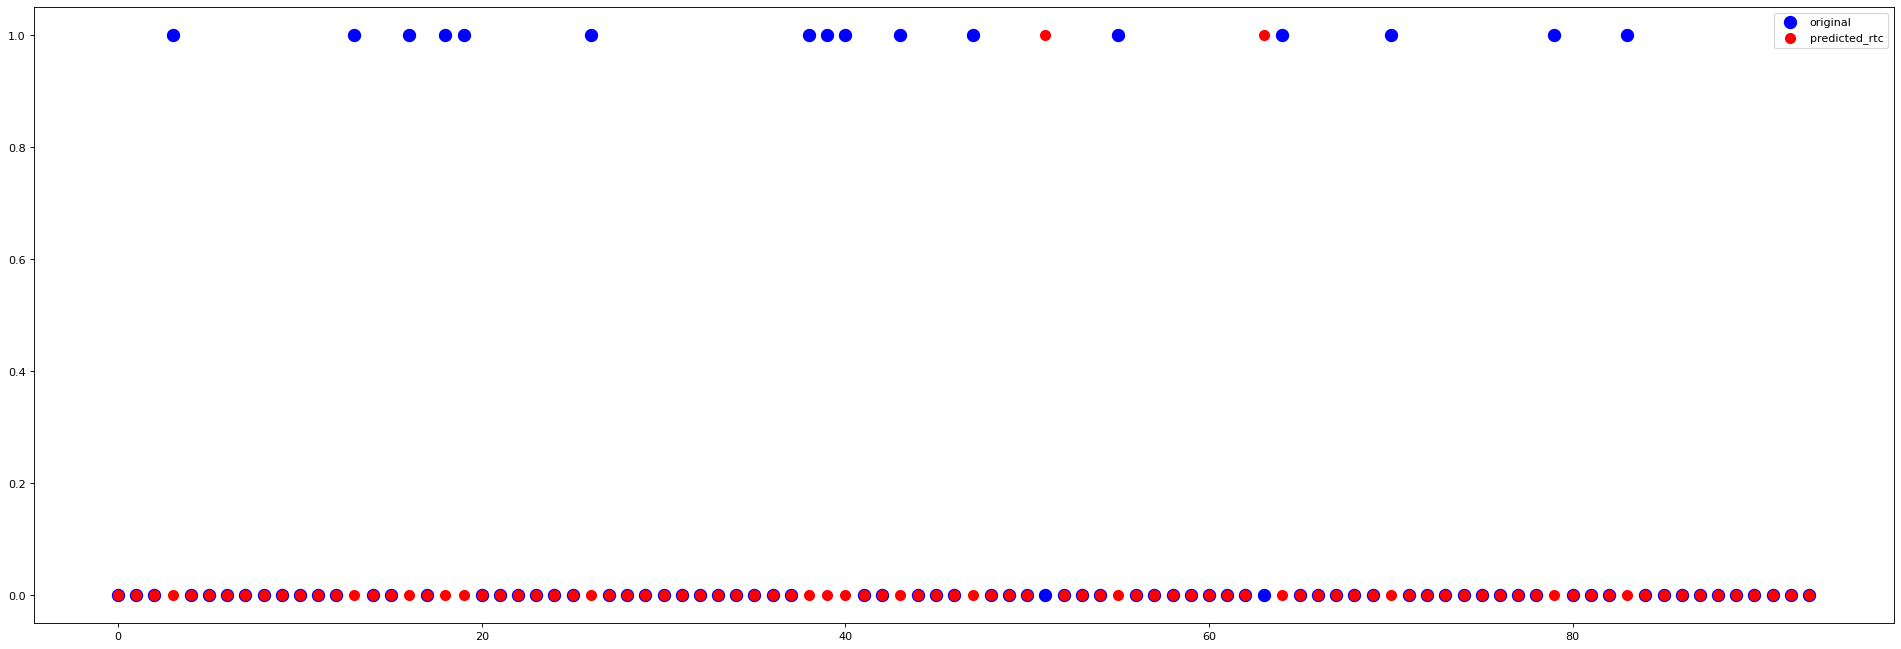

train_confussion_matrix: 
[[174   0]
 [  7  38]]
test_confussion_matrix: 
[[76  2]
 [16  0]]


In [99]:
RFC(X_train, y_train, X_test, y_test)

In [100]:
def decisionTree(X_train,Y_train,X_test,Y_test):
  tree = DecisionTreeRegressor (random_state = 0)
  tree.fit(X_train, Y_train)
  train_preds = tree.predict(X_train)
  test_preds = tree.predict(X_test)

  # Scores

  accuracy_score_train =accuracy_score(Y_train, train_preds)
  accuracy_score_test = accuracy_score(Y_test, test_preds)

  print('accuracy_score_train: ', accuracy_score_train)
  print('accuracy_score_test: ', accuracy_score_test)

  predVisualization(test_preds,Y_test)

  confusion_matrix_train = confusion_matrix(Y_train, train_preds)
  confusion_matrix_test = confusion_matrix(Y_test, test_preds)

  print("train_confussion_matrix: ")
  print(confusion_matrix_train)
  print("test_confussion_matrix: ")
  print(confusion_matrix_test)

accuracy_score_train:  1.0
accuracy_score_test:  0.6595744680851063


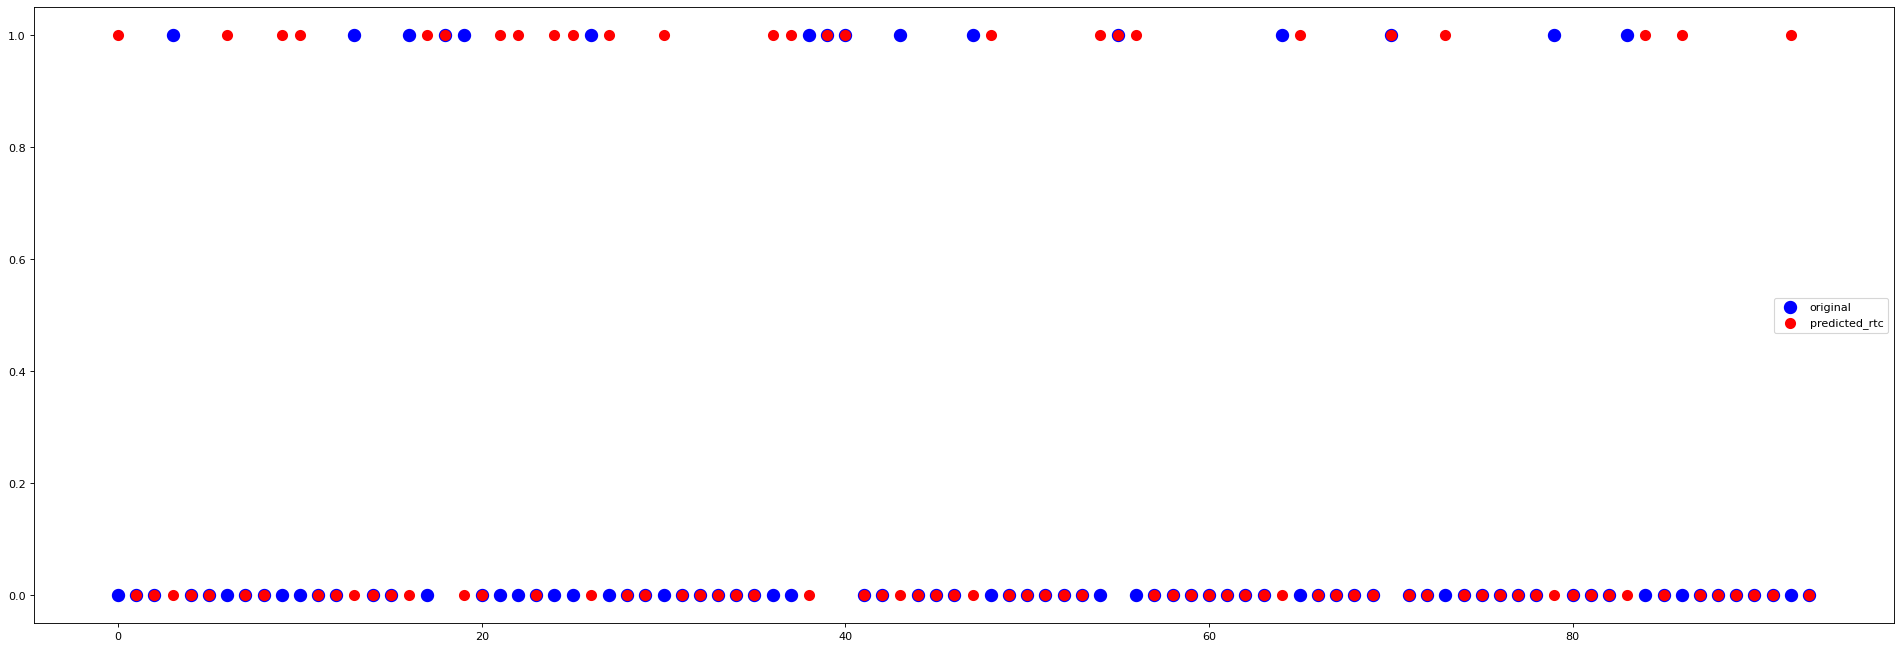

train_confussion_matrix: 
[[174   0]
 [  0  45]]
test_confussion_matrix: 
[[57 21]
 [11  5]]


In [101]:
decisionTree(X_train, y_train, X_test, y_test)

In [102]:
def KNN(X_train,Y_train,X_test,Y_test):
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(X_train, Y_train)
  train_preds = knn.predict(X_train)
  test_preds = knn.predict(X_test)

  # Scores

  accuracy_score_train =accuracy_score(Y_train, train_preds)
  accuracy_score_test = accuracy_score(Y_test, test_preds)

  print('accuracy_score_train: ', accuracy_score_train)
  print('accuracy_score_test: ', accuracy_score_test)

  predVisualization(test_preds,Y_test)

  confusion_matrix_train = confusion_matrix(Y_train, train_preds)
  confusion_matrix_test = confusion_matrix(Y_test, test_preds)

  print("train_confussion_matrix: ")
  print(confusion_matrix_train)
  print("test_confussion_matrix: ")
  print(confusion_matrix_test)

accuracy_score_train:  0.8264840182648402
accuracy_score_test:  0.8085106382978723


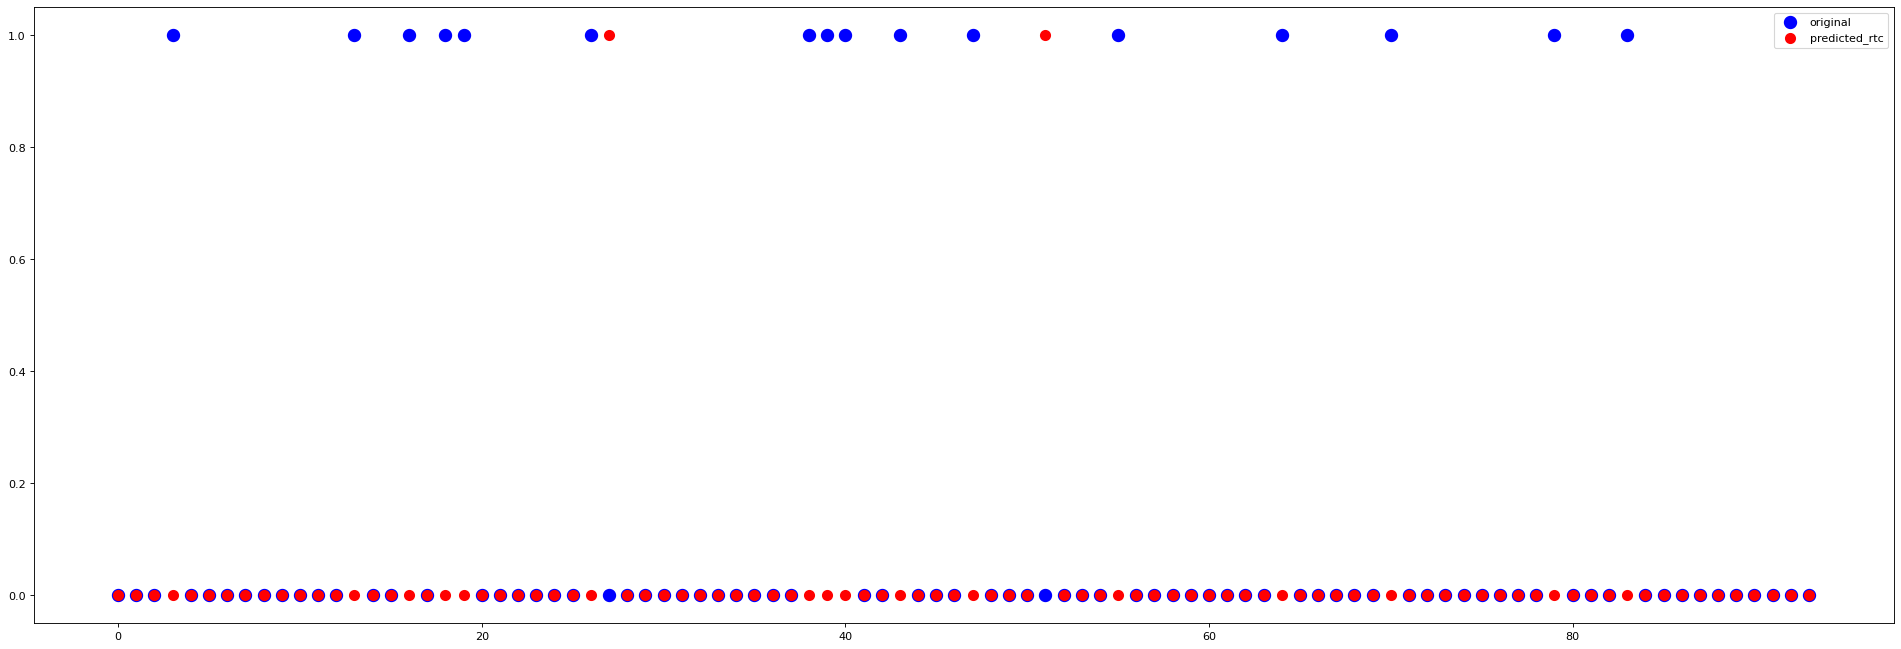

train_confussion_matrix: 
[[174   0]
 [ 38   7]]
test_confussion_matrix: 
[[76  2]
 [16  0]]


In [103]:
KNN(X_train, y_train, X_test, y_test)

Klasifikasyon skorlarına bakıldığında Random Forest Classifier'ın diğer yöntemlere göre daha iyi sonuçlar verdiği, ancak değerlerin iyileştirilebilmesi için tuning işleminin yapılmasıgerektiği anlaşılmaktadır.